In [269]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report


In [271]:
# importing the dataset
heart_data =pd.read_csv('heart_failure.csv')
heart_data.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [273]:
# checking the number of rows and columns 
heart_data.shape

(299, 13)

In [275]:
# checking the information of the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [277]:
# checking the columns in the data
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [278]:
# fixing the inconsistency in the columns name by renaming
heart_data.rename({'DEATH_EVENT':'death_event'}, axis=1,inplace=True)

In [280]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [282]:
# spliting the dataset into two categories to make it easier for analysis
categorical_variables =heart_data[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
continous_variables =heart_data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death_event']]

Note for categorical data

Anaemia: 0 means that the person does not have anaemia, if 1 it does. <br>
Diabetes: 0 means that the person does not have diabetes, if 1 it does. <br>
High_blood_pressure: 0 means that the person does not have high_blood_pressure, if 1 it does. <br>
Smoking: 0 means that the person does not have smoking, if 1 it does. <br>
Sex: 0 is for female ,1 is for male. <br>
Death_event: 0 means heart failure is not the cause of the death, if 1 it does.

In [285]:
# checking for the null value in the dataset
heart_data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [286]:
# checking for duplicated value in the dataset
heart_data.duplicated().sum()

0

In [288]:
# checking for the descriptive statistics of the dataset
round(continous_variables.describe(),2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,581.84,38.08,263358.03,1.39,136.63,130.26,0.32
std,11.89,970.29,11.83,97804.24,1.03,4.41,77.61,0.47
min,40.00,23.00,14.00,25100.00,0.50,113.00,4.00,0.00
25%,51.00,116.50,30.00,212500.00,0.90,134.00,73.00,0.00
50%,60.00,250.00,38.00,262000.00,1.10,137.00,115.00,0.00
75%,70.00,582.00,45.00,303500.00,1.40,140.00,203.00,1.00
max,95.00,7861.00,80.00,850000.00,9.40,148.00,285.00,1.00


In [289]:
# using the groupby function on the target variable 'death_event' to check the imbalance in the dataset
heart_data.groupby('death_event').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
death_event,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [290]:
age = heart_data['age']
platelets =heart_data['platelets']

In [292]:
# visualizing the unbalanced data with a scatter plot, the color will depends on 'death_event' (0,1)
fig =px.scatter(heart_data,x='platelets',y='age', color='death_event')

fig.update_layout(
    title={
        'text':'Visualizing the unbalanced data',
        'x':0.5,
        'xanchor': 'center',
        'font':{
            'size':24
        }
    },
    xaxis_title="Platelets",
    yaxis_title="Age"
)


fig.show()

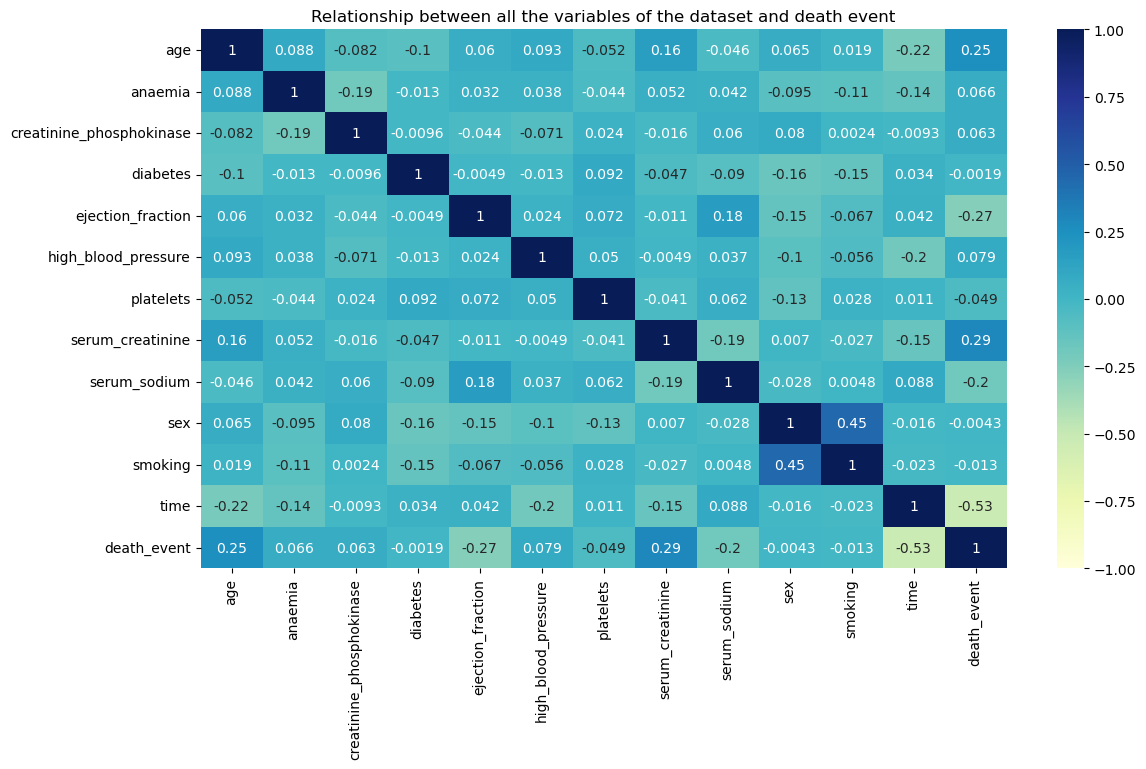

In [294]:
# visualizing the correlation relationship among the variables
plt.figure(figsize=(13,7))
sns.heatmap(heart_data.corr(),vmin=-1,vmax=1,cmap='YlGnBu',annot=True)
plt.title('Relationship between all the variables of the dataset and death event')
plt.show()

In [295]:
# spliting the dataset into two categories to make it easier for analysis
categorical_variables =heart_data[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
continous_variables =heart_data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death_event']]

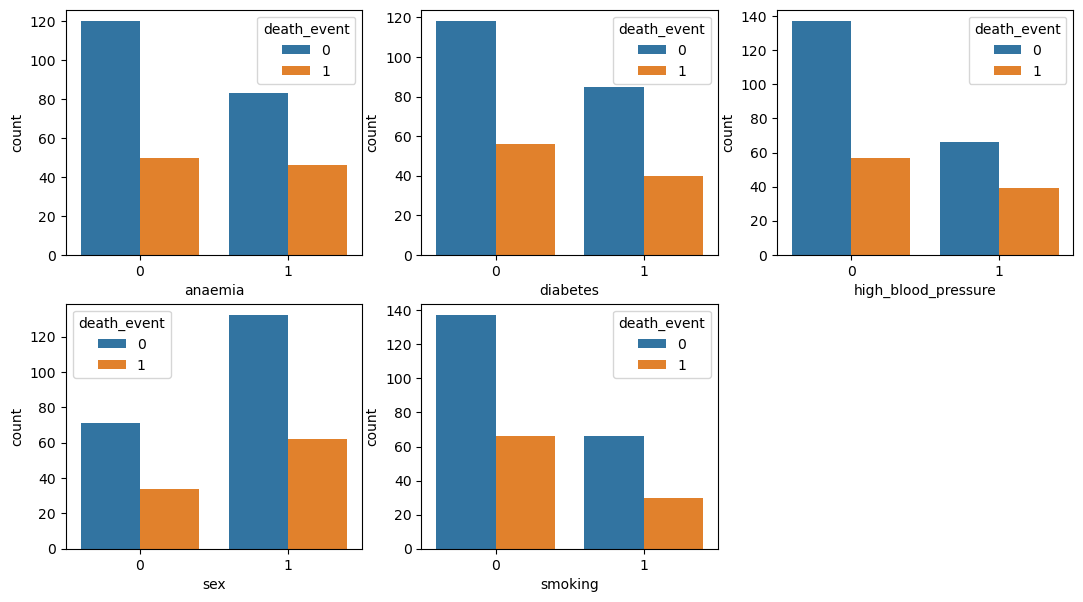

In [296]:
# ploting the impact of categorical data on death event
plt.figure(figsize=(13,7))
for i, cat in enumerate(categorical_variables):
    plt.subplot(2,3,i+1)
    sns.countplot(heart_data,x=cat,hue='death_event')
plt.show()


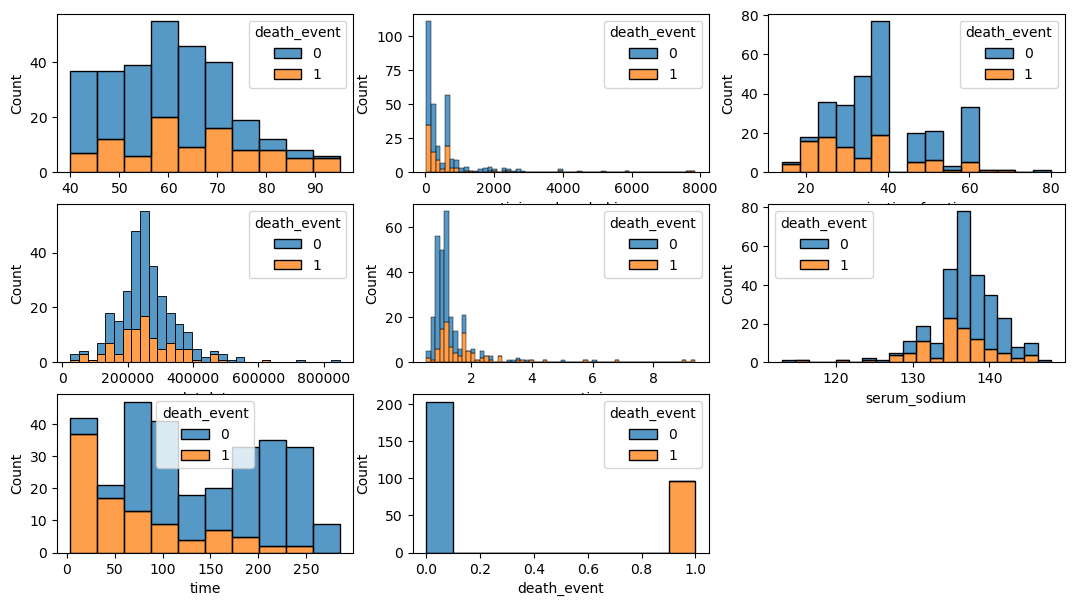

In [299]:
# ploting the impact of continous data on death event
plt.figure(figsize=(13,7))
for j, cat in enumerate(continous_variables):
    plt.subplot(3,3,j+1)
    sns.histplot(heart_data,x=cat,hue='death_event',multiple='stack')
plt.show()

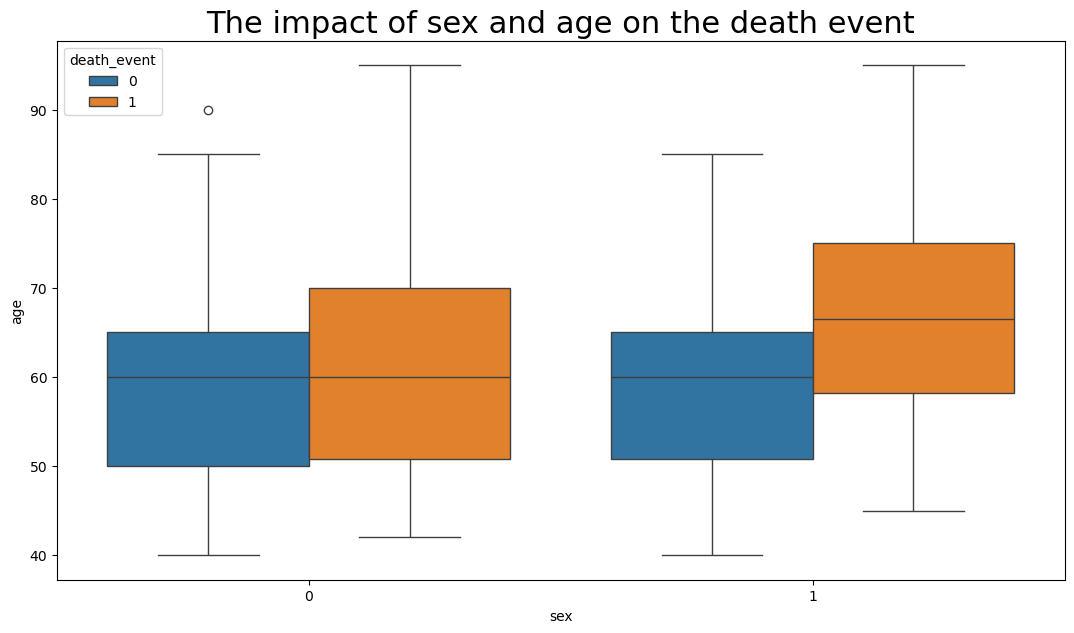

In [301]:
# visualizing with boxplot of variable between sex and age
plt.figure(figsize=(13,7))
sns.boxplot(heart_data,x='sex',y='age', hue='death_event')
plt.title('The impact of sex and age on the death event', fontsize=22)
plt.show()

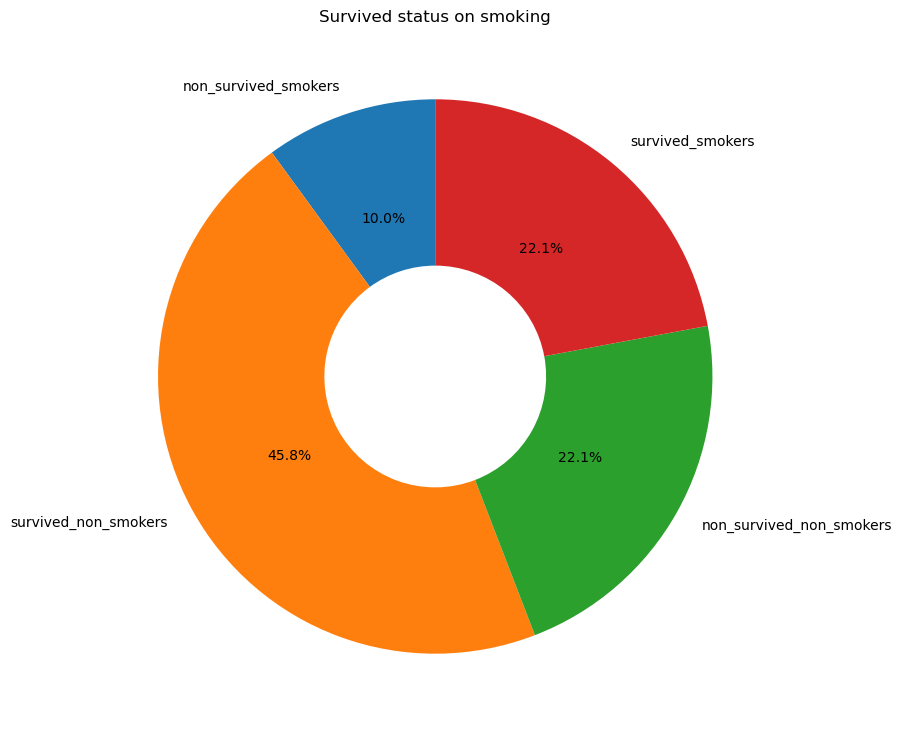

In [302]:
# Analysing the survival status on smoking
smokers=heart_data[heart_data['smoking']==1]
non_smokers= heart_data[heart_data['smoking']==0]

non_survived_smokers=smokers[smokers['death_event']==1]
survived_non_smokers=non_smokers[non_smokers['death_event']==0]

non_survived_non_smokers=non_smokers[non_smokers['death_event']==1]
survived_smokers=smokers[smokers['death_event']==0]

smoking_data=[len(non_survived_smokers),len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_label=['non_survived_smokers','survived_non_smokers','non_survived_non_smokers','survived_smokers']


plt.figure(figsize=(9,9))
plt.pie(smoking_data,labels=smoking_label,autopct='%.1f%%',startangle=90,wedgeprops={'width': 0.6})
plt.title('Survived status on smoking')
plt.show()

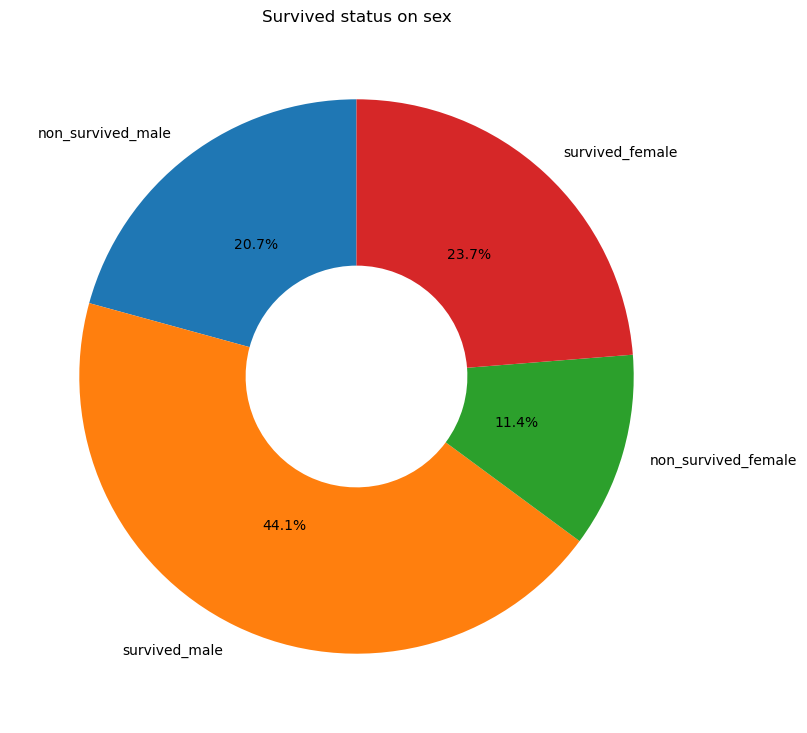

In [303]:
# Analysing the survival status on sex
male=heart_data[heart_data['sex']==1]
female= heart_data[heart_data['sex']==0]

non_survived_male=male[male['death_event']==1]
survived_male=male[male['death_event']==0]

non_survived_female=female[female['death_event']==1]
survived_female=female[female['death_event']==0]

sex_data=[len(non_survived_male),len(survived_male),len(non_survived_female),len(survived_female)]
sex_label=['non_survived_male','survived_male','non_survived_female','survived_female']


plt.figure(figsize=(9,9))
plt.pie(sex_data,labels=sex_label,autopct='%.1f%%',startangle=90,wedgeprops={'width': 0.6})
plt.title('Survived status on sex')
plt.show()

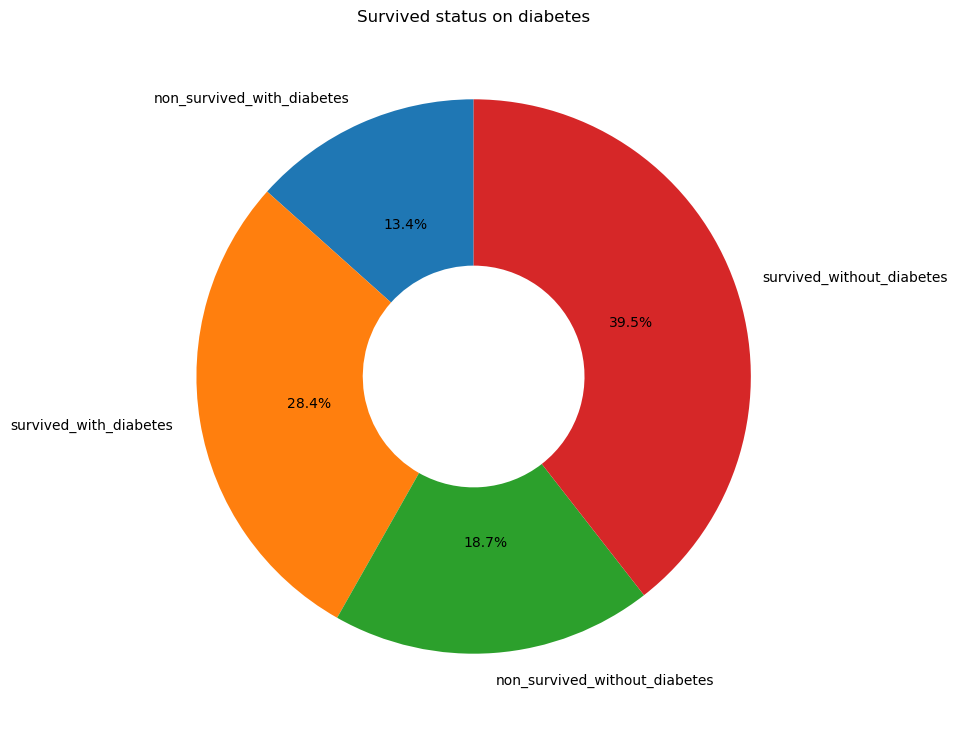

In [304]:
# Analysing the survival status on diabetes
with_diabetes=heart_data[heart_data['diabetes']==1]
without_diabetes= heart_data[heart_data['diabetes']==0]

non_survived_with_diabetes=with_diabetes[with_diabetes['death_event']==1]
survived_with_diabetes=with_diabetes[with_diabetes['death_event']==0]

non_survived_without_diabetes=without_diabetes[without_diabetes['death_event']==1]
survived_without_diabetes=without_diabetes[without_diabetes['death_event']==0]

diabetes_data=[len(non_survived_with_diabetes),len(survived_with_diabetes),len(non_survived_without_diabetes),len(survived_without_diabetes)]
diabetes_label=['non_survived_with_diabetes','survived_with_diabetes','non_survived_without_diabetes','survived_without_diabetes']


plt.figure(figsize=(9,9))
plt.pie(diabetes_data,labels=diabetes_label,autopct='%.1f%%',startangle=90,wedgeprops={'width': 0.6})
plt.title('Survived status on diabetes')
plt.show()

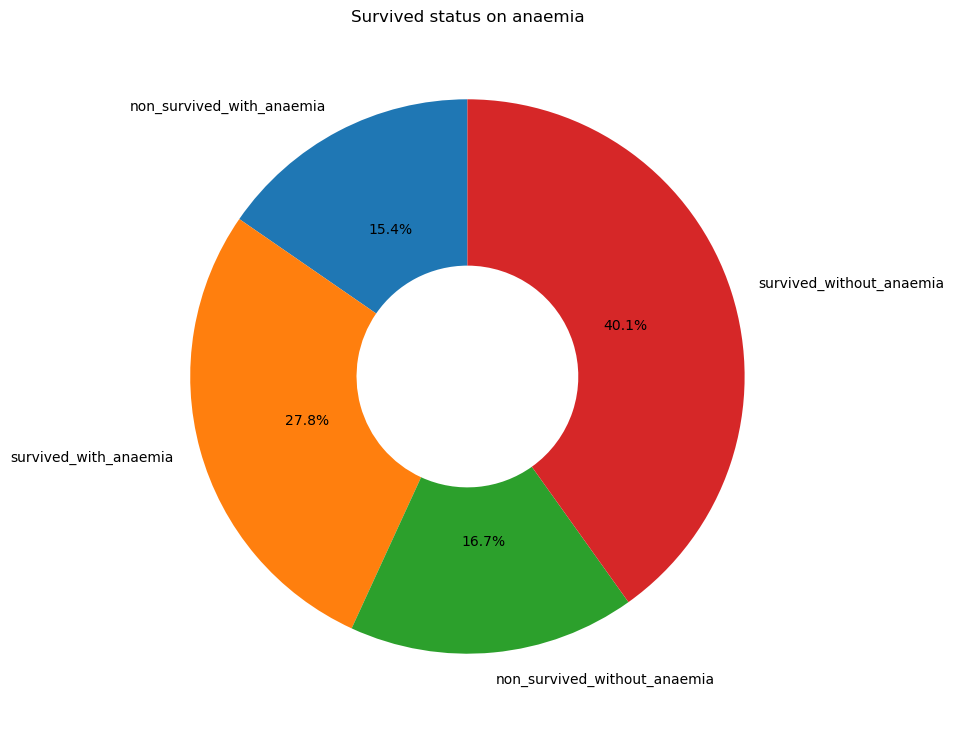

In [305]:
# Analysing the survival status on anaemia
with_anaemia=heart_data[heart_data['anaemia']==1]
without_anaemia= heart_data[heart_data['anaemia']==0]

non_survived_with_anaemia=with_anaemia[with_anaemia['death_event']==1]
survived_with_anaemia=with_anaemia[with_anaemia['death_event']==0]

non_survived_without_anaemia=without_anaemia[without_anaemia['death_event']==1]
survived_without_anaemia=without_anaemia[without_anaemia['death_event']==0]

anaemia_data=[len(non_survived_with_anaemia),len(survived_with_anaemia),len(non_survived_without_anaemia),len(survived_without_anaemia)]
anaemia_label=['non_survived_with_anaemia','survived_with_anaemia','non_survived_without_anaemia','survived_without_anaemia']


plt.figure(figsize=(9,9))
plt.pie(anaemia_data,labels=anaemia_label,autopct='%.1f%%',startangle=90,wedgeprops={'width': 0.6})
plt.title('Survived status on anaemia')
plt.show()

In [307]:
# Data modelling and prediction on the continous variable
X=continous_variables.drop('death_event',axis=1)
y= continous_variables['death_event']

In [308]:
# spliting the data into train-test-split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [309]:
# checking the shape of the train and test data
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(209, 7)
(90, 7)
(209,)
(90,)


(None, None, None, None)

In [310]:
# Data scaling of the train test data
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [311]:
# list to save all the value from different model accuracy for comparison using bar chart
accuracy_list = []

# Logistic Regression

In [313]:
# Initializing,test and predict of the logistic regression
lr_model =LogisticRegression()
lr_model.fit(X_train_scaled,y_train)
lr_prediction=lr_model.predict(X_test_scaled)
lr_accuracy= (round(accuracy_score(lr_prediction,y_test),4)*100)
accuracy_list.append(lr_accuracy)

# Support Vector Machine

In [317]:
# Initializing,test and predict of the SVM
svc_model =SVC()
svc_model.fit(X_train_scaled,y_train)
svc_prediction=svc_model.predict(X_test_scaled)
svc_accuracy= (round(accuracy_score(svc_prediction,y_test),4)*100)
accuracy_list.append(svc_accuracy)

# KNearestNehibour

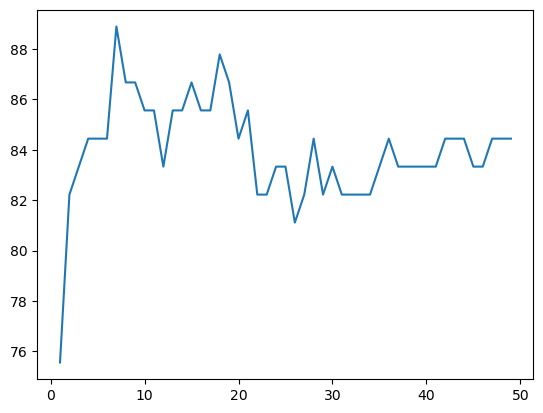

In [319]:
# use this program to find the optional value of k

knn_list=[]
for k in range(1,50):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train)
    knn_prediction=knn_model.predict(X_test_scaled)
    knn_accuracy= (round(accuracy_score(knn_prediction,y_test),4)*100)
    knn_list.append(knn_accuracy)

k =np.arange(1,50)
plt.plot(k,knn_list)

In [320]:
knn_model=KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_scaled,y_train)
knn_prediction=knn_model.predict(X_test_scaled)
knn_accuracy= (round(accuracy_score(knn_prediction,y_test),4)*100)
accuracy_list.append(knn_accuracy)

# Decision Tree

In [323]:
# Initializing,test and predict of the Decision Tree
dt_model =DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt_model.fit(X_train_scaled,y_train)
dt_prediction=dt_model.predict(X_test_scaled)
dt_accuracy= (round(accuracy_score(dt_prediction,y_test),4)*100)
accuracy_list.append(dt_accuracy)

# Naive Bayes

In [325]:
# Initializing,test and predict of the Naive Bayes
nb_model =GaussianNB()
nb_model.fit(X_train_scaled,y_train)
nb_prediction=nb_model.predict(X_test_scaled)
nb_accuracy= (round(accuracy_score(nb_prediction,y_test),4)*100)
accuracy_list.append(nb_accuracy)

# Random Forest Classifier

In [327]:
# Initializing,test and predict of the Random Forest
rf_model =RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)
rf_prediction=rf_model.predict(X_test_scaled)
rf_accuracy= (round(accuracy_score(rf_prediction,y_test),4)*100)
accuracy_list.append(rf_accuracy)

In [328]:
accuracy_list

[87.78, 86.67, 84.44, 88.89, 82.22, 86.67]

In [329]:
model=['Logistic Regression','SVC','KNearestNeighbors','Decision Tree','Naive Bayes','Random Forest' ]

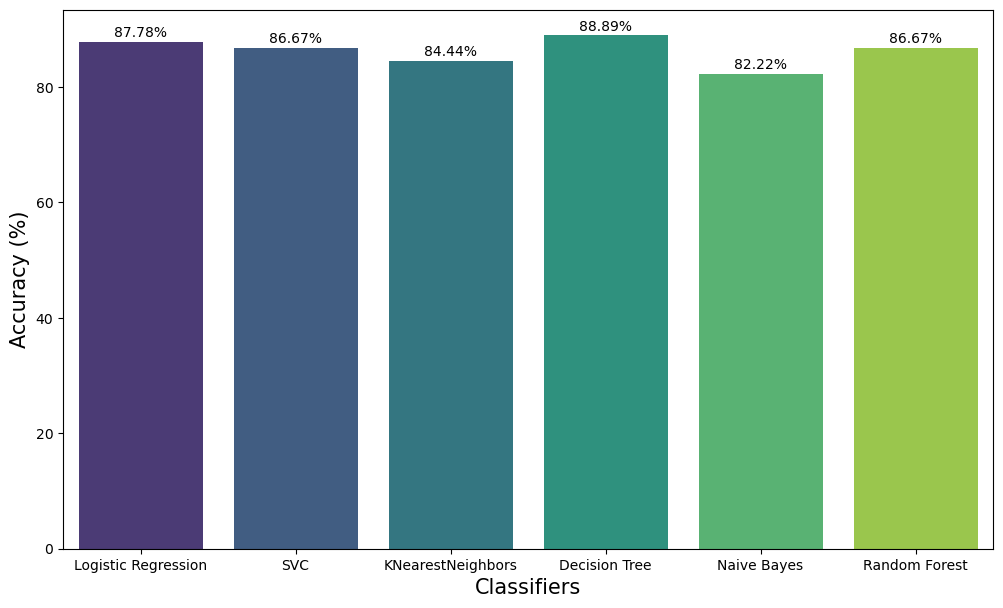

In [330]:
plt.figure(figsize=(12,7))
ax =sns.barplot(x=model,y=accuracy_list,palette='viridis')
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)

for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x=p.get_x()
    y=p.get_y()
    ax.annotate(f"{height}%" ,(x + width/2, y+ height*1.01),ha='center')

plt.show()